In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
import keras

In [17]:
df=pd.read_csv("HDB.csv")

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-17,64.019997,64.275002,63.445000,63.525002,61.502357,1008400
1,2019-06-18,63.855000,64.125000,63.299999,63.404999,61.386177,1204000
2,2019-06-19,63.279999,63.435001,62.785000,63.325001,61.622646,1234000
3,2019-06-20,63.755001,64.385002,63.700001,64.379997,62.649281,998800
4,2019-06-21,63.900002,63.900002,62.814999,63.404999,61.700493,1213600


In [19]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-06-10,58.660000,59.270000,58.630001,59.090000,59.090000,1620500
1255,2024-06-11,58.830002,59.150002,58.419998,59.049999,59.049999,2798500
1256,2024-06-12,59.669998,60.570000,59.599998,60.320000,60.320000,3196400
1257,2024-06-13,60.680000,60.680000,60.070000,60.250000,60.250000,2443800
1258,2024-06-14,60.200001,60.680000,59.430000,60.660000,60.660000,1467400


<Axes: >

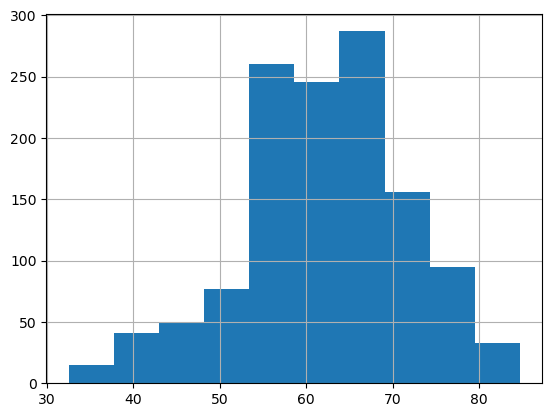

In [20]:
df["Open"].hist()

<Axes: >

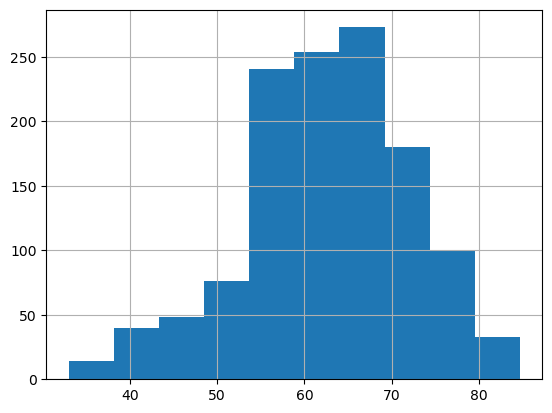

In [23]:
df["High"].hist()

<Axes: >

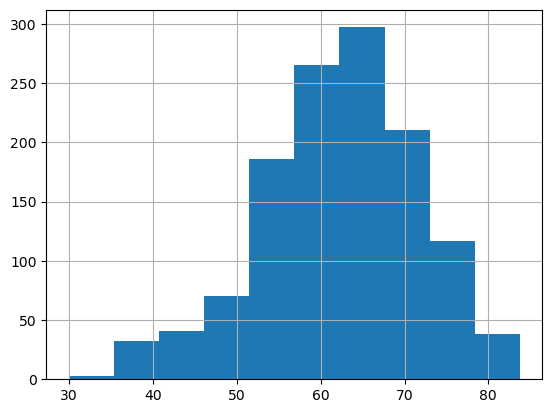

In [24]:
df["Close"].hist()

In [25]:
df1 = df.reset_index()['Close']

In [26]:
df1.shape

(1259,)

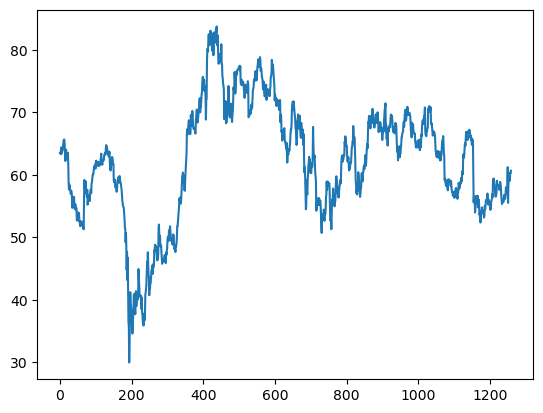

In [27]:
plt.plot(df1)

In [28]:
import numpy as np

In [29]:
df1

0       63.525002
1       63.404999
2       63.325001
3       64.379997
4       63.404999
          ...    
1254    59.090000
1255    59.049999
1256    60.320000
1257    60.250000
1258    60.660000
Name: Close, Length: 1259, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
df1.shape

(1259, 1)

In [32]:
print(df1)

[[0.62400079]
 [0.62176983]
 [0.62028261]
 ...
 [0.56441719]
 [0.56311583]
 [0.57073806]]


In [33]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [34]:
training_size, test_size

(818, 441)

In [35]:
train_data

array([[0.62400079],
       [0.62176983],
       [0.62028261],
       [0.63989584],
       [0.62176983],
       [0.62846253],
       [0.6285555 ],
       [0.63087935],
       [0.63998889],
       [0.65179396],
       [0.66043877],
       [0.66350627],
       [0.66359917],
       [0.64947011],
       [0.61609962],
       [0.59955381],
       [0.621398  ],
       [0.6332962 ],
       [0.61377576],
       [0.61358989],
       [0.60726902],
       [0.61349692],
       [0.62427963],
       [0.5897007 ],
       [0.53522961],
       [0.51487264],
       [0.52918757],
       [0.52509765],
       [0.51347839],
       [0.51199109],
       [0.50176616],
       [0.51180521],
       [0.50808703],
       [0.5010225 ],
       [0.46030864],
       [0.48215283],
       [0.4740658 ],
       [0.48958912],
       [0.49219189],
       [0.4932144 ],
       [0.47573898],
       [0.45714816],
       [0.46309722],
       [0.47016175],
       [0.45510317],
       [0.45984385],
       [0.45947201],
       [0.422

In [36]:
#Now splitting the dataset for time series and making it into a matrix
def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [37]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [42]:
print(X_test.shape), print(y_test.shape)

(340, 100, 1)
(340,)


(None, None)

In [40]:
#Now modelling it for LSTM
#For LSTM the shape should be of 3-d, so we are adding 1 at the end of the train and test.
#The reshaped input should be in the form of [samples,timesteps,features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [47]:
#Creating a Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - loss: 0.1842 - val_loss: 0.0149
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0218 - val_loss: 0.0110
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0093 - val_loss: 0.0031
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0062 - val_loss: 0.0025
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.16.1'

In [55]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [59]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [60]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

62.66003289758454

In [61]:
math.sqrt(mean_squared_error(y_test,test_predict))

61.613086676571484

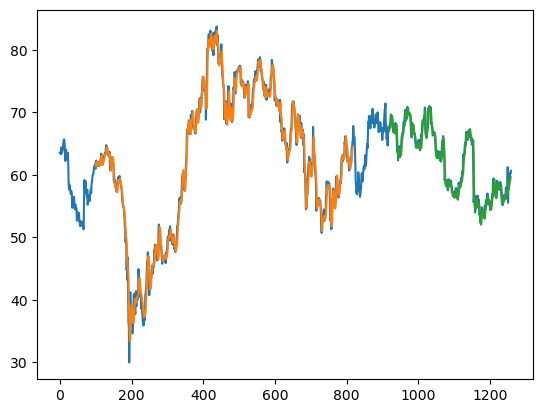

In [62]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_data)

441

In [81]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input

[0.6584866581430254,
 0.6622049142553462,
 0.580405287592391,
 0.4764826273195274,
 0.4937720860053526,
 0.48113033126732974,
 0.48596390619141283,
 0.446365524328583,
 0.4617958642536556,
 0.4920989125841436,
 0.49544527801737714,
 0.4722067582783648,
 0.4788994519632005,
 0.4746235829220379,
 0.4963748002161218,
 0.4617958642536556,
 0.47425174801539793,
 0.48503438399266796,
 0.4772262785419915,
 0.4398587016200278,
 0.4422755262637009,
 0.42833241442029346,
 0.4164343109047348,
 0.4242424163554114,
 0.45045546662101754,
 0.44320504846244557,
 0.46160999327737506,
 0.4487822746089928,
 0.4543595937096191,
 0.4469232302115035,
 0.4437628287086294,
 0.44246139723998146,
 0.4311210739706065,
 0.4376278223158985,
 0.46569991697899404,
 0.4558468217912842,
 0.4642126888973287,
 0.48020080906858487,
 0.48429073277020385,
 0.48187398248979385,
 0.482245817396434,
 0.5026956775851333,
 0.5025098066088528,
 0.4731362804771094,
 0.4697899336346917,
 0.48429073277020385,
 0.47387993169957376,


In [83]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5676379]
101
1 day input [0.49209891 0.49544528 0.47220676 0.47889945 0.47462358 0.4963748
 0.46179586 0.47425175 0.48503438 0.47722628 0.4398587  0.44227553
 0.42833241 0.41643431 0.42424242 0.45045547 0.44320505 0.46160999
 0.44878227 0.45435959 0.44692323 0.44376283 0.4424614  0.43112107
 0.43762782 0.46569992 0.45584682 0.46421269 0.48020081 0.48429073
 0.48187398 0.48224582 0.50269568 0.50250981 0.47313628 0.46978993
 0.48429073 0.47387993 0.47927129 0.47685446 0.45417363 0.45659045
 0.45677634 0.47759811 0.48354716 0.48838075 0.50120838 0.49154123
 0.54508272 0.53950549 0.54731367 0.54024913 0.52928054 0.52091468
 0.5036252  0.49358614 0.49395798 0.49934933 0.50976021 0.54080683
 0.52686372 0.52946643 0.52612007 0.5274215  0.52760737 0.5274215
 0.51385013 0.52388919 0.53746048 0.53076777 0.5227738  0.49823384
 0.48540622 0.47164905 0.47480945 0.48224582 0.48317534 0.47778398
 0.48484851 0.49860568 0.49358614 0.48726526 0.48689352 0.49841979
 0.52128649 0.51701061 0.50269568 0.

In [84]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [85]:
import matplotlib.pyplot as plt

In [86]:
len(df1)

1259

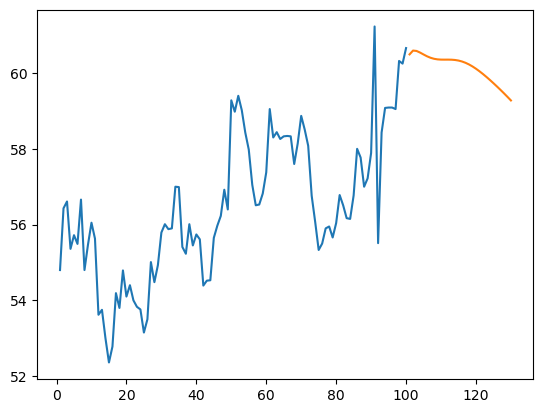

In [87]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

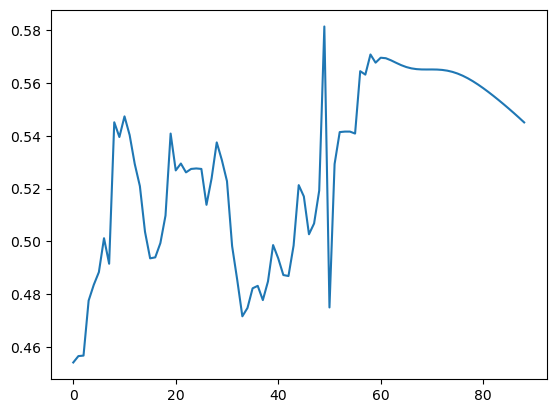

In [88]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [89]:
df3=scaler.inverse_transform(df3).tolist()

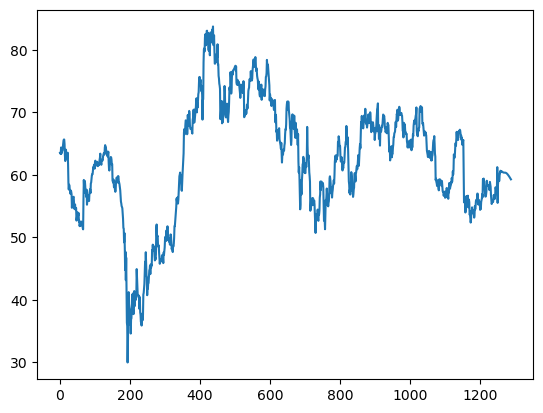

In [90]:
plt.plot(df3)